In [1]:
import pandas as pd
import numpy as np
import plot_params
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import export_graphviz


include EDA, correlations -> matrix, mutual information, dont use accuracy -> f1 score look, multiple models with the pipeline, multicollinearity need to drop one OHE, feature selection, hyperparameter tuning, classification tree no, random forest, gradiaent boost or catboost, svm, linear model ridge classifier. make dataset imbalance?

In [2]:
df = pd.read_csv("mushrooms.csv")
plot_params.apply_rcparams()

In [3]:
df = df.rename(columns={'class' : 'edibility'})

In [4]:
label_encoder = preprocessing.LabelEncoder()
df_encoded = df.apply(lambda col: label_encoder.fit_transform(col))

In [5]:
"""label_encoders = {}  # Dictionary to store encoders for each column
df_encoded = df.copy()
for col in df_encoded.columns:
    le = preprocessing.LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder for later decoding

# To decode values back to original labels
df_decoded = df_encoded.copy()
for col, le in label_encoders.items():
    df_decoded[col] = le.inverse_transform(df_encoded[col])  # Convert back
df_encoded = df.apply(lambda col: label_encoders.fit_transform(col))"""

'label_encoders = {}  # Dictionary to store encoders for each column\ndf_encoded = df.copy()\nfor col in df_encoded.columns:\n    le = preprocessing.LabelEncoder()\n    df_encoded[col] = le.fit_transform(df_encoded[col])\n    label_encoders[col] = le  # Save encoder for later decoding\n\n# To decode values back to original labels\ndf_decoded = df_encoded.copy()\nfor col, le in label_encoders.items():\n    df_decoded[col] = le.inverse_transform(df_encoded[col])  # Convert back\ndf_encoded = df.apply(lambda col: label_encoders.fit_transform(col))'

In [6]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
X = df_encoded.iloc[:, [1,2,3,4,5,20]]
Y = df_encoded['edibility']
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.2, random_state=42)
rfc = rfc.fit(X_train,Y_train)

In [7]:
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9956923076923077


In [8]:
tree = rfc.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns,
                           class_names=['Edible', 'Poisonous'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", view=True)

'random_forest_tree.pdf'

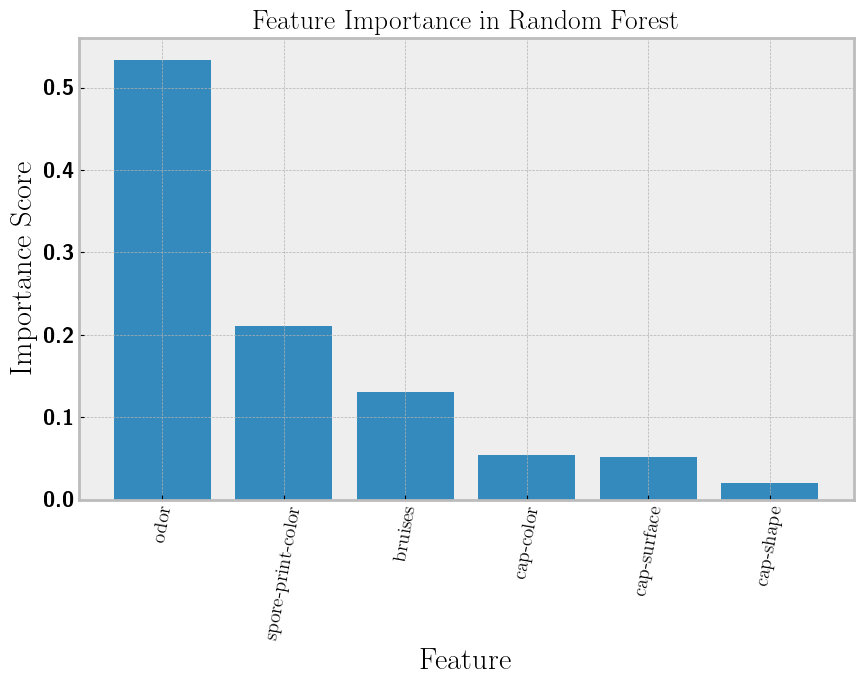

In [9]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=80)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

what does this plot mean? more variance

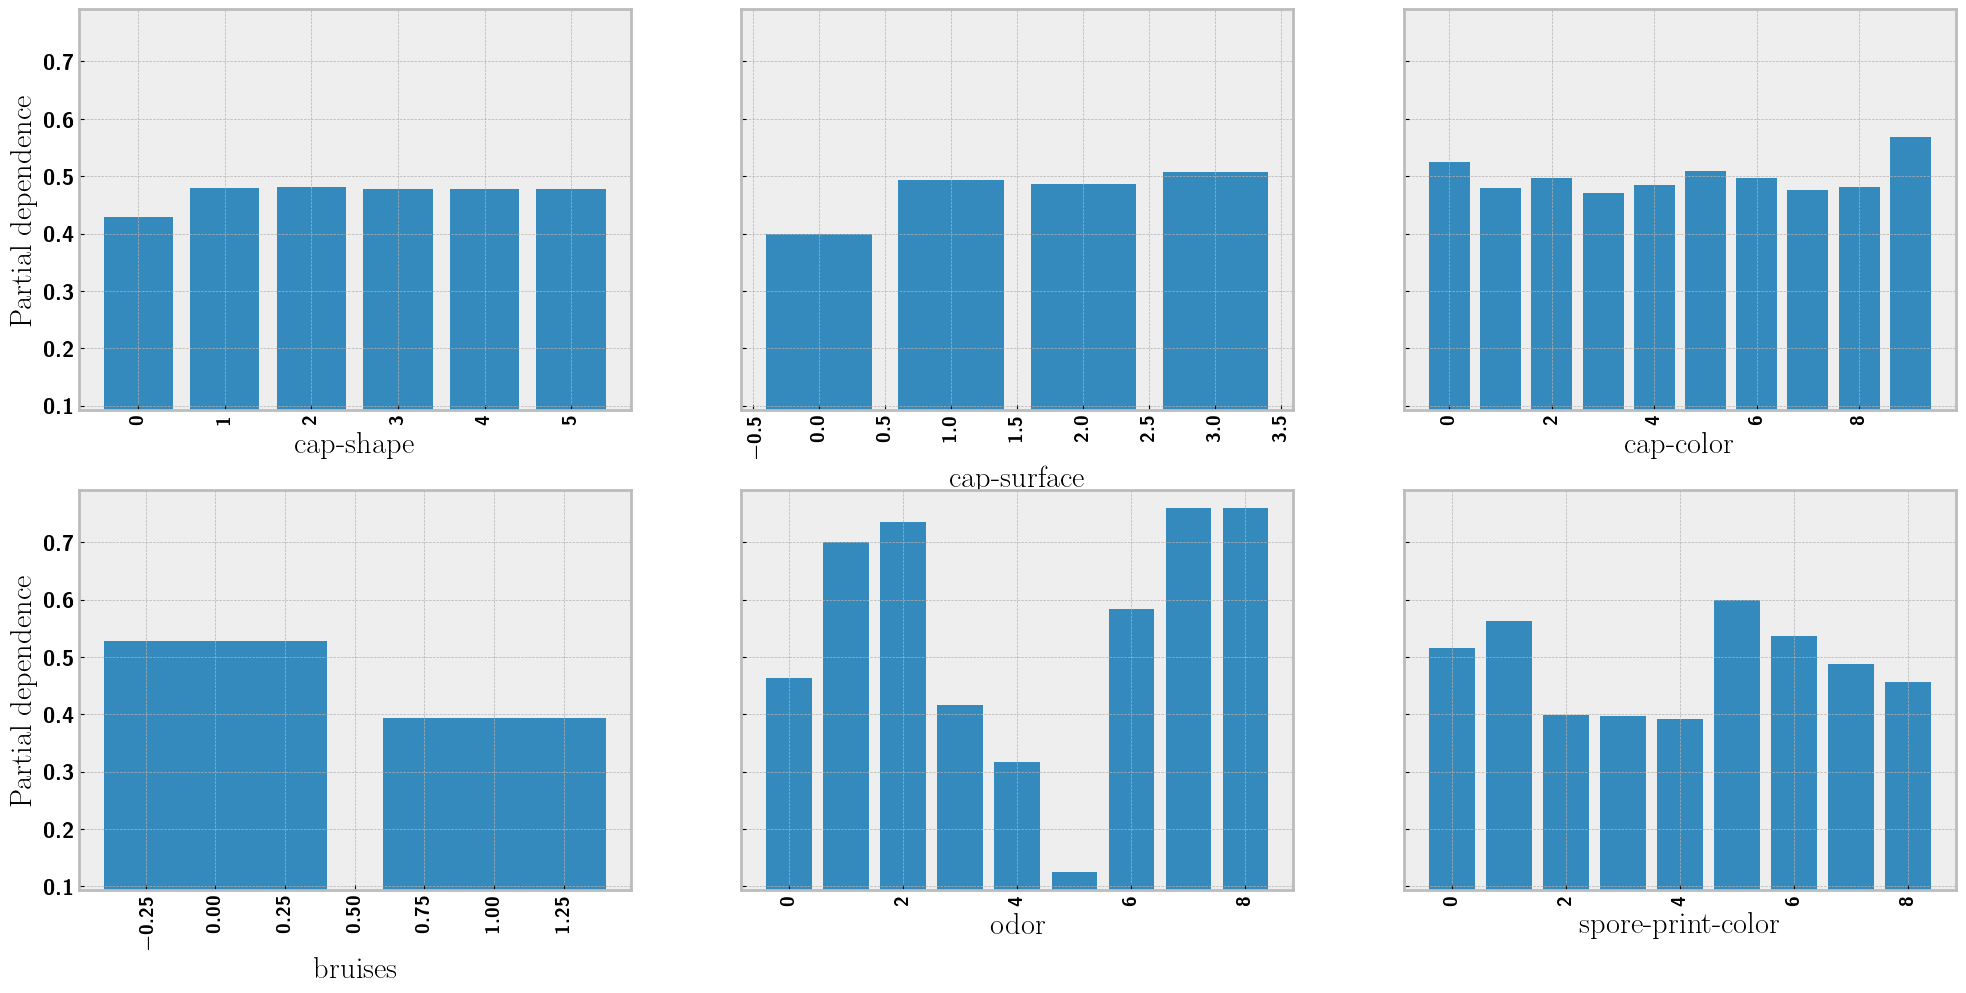

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
labels_0 = label_encoder.classes_
#ax.set_xticklabels(odor_labels)
PartialDependenceDisplay.from_estimator(rfc, X_train, features=[0,1,2,3,4,5], 
                                        feature_names=X_train.columns, ax=ax, categorical_features=[0,1,2,3,4,5])
plt.tight_layout()
plt.show()
